In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [4]:
X,y = make_blobs(n_samples=10, centers=3, n_features=2,
                  random_state=0)

In [5]:
kmeans = KMeans(n_clusters=5,random_state=42)

In [6]:
y_pred = kmeans.fit_predict(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
y_pred

array([4, 1, 3, 4, 0, 0, 2, 3, 3, 1], dtype=int32)

In [8]:
y_pred is kmeans.labels_

True

In [10]:
v = kmeans.cluster_centers_
v

array([[ 0.0401914 ,  1.81961691],
       [ 1.83183315,  4.28894623],
       [-4.07989383,  3.57150086],
       [ 2.80560419,  0.65580377],
       [ 0.99668244,  5.23622333]])

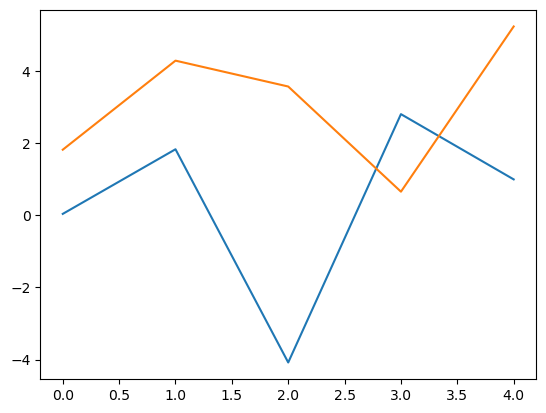

In [13]:
plt.plot(v)

In [15]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]]) 
kmeans.predict(X_new)

array([0, 3, 2, 2], dtype=int32)

In [16]:
X_newest = kmeans.transform(X_new).round(2)
X_newest

array([[0.18, 2.93, 4.37, 3.11, 3.39],
       [2.97, 2.57, 7.25, 1.36, 3.81],
       [3.26, 5.  , 1.22, 6.26, 4.58],
       [3.12, 5.15, 1.52, 6.09, 4.84]])

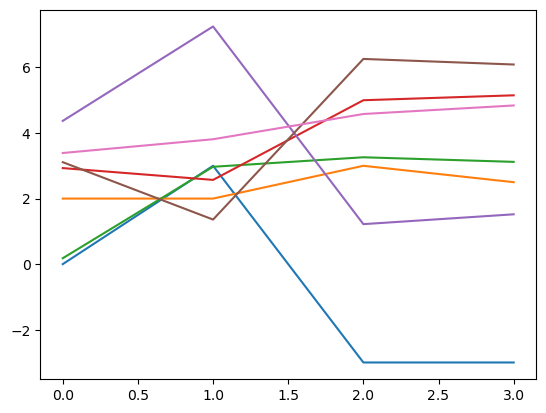

In [17]:
plt.plot(X_new)
plt.plot(X_newest)